In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("C:\\Users\\solma\\OneDrive\\Masaüstü\\DP.xlsx")
data.sample(5)

,№,"Soyadı, Adı, Ata adı",Təhsil ölkəsi,Universitet,Təhsil səviyyəsi,İxtisas,Status
98,99,Əhmədov Camal Rauf,Böyük Britaniya və Şimali\nİrlandiya Birləşmiş...,"""University of Manchester""",Magistratura,Şəhər dizaynı və\nbeynəlxalq planlama,Dövlət Proqramı iştirakçısı
355,356,Məmmədova Günay Anar,Amerika Birləşmiş Ştatları,"""Columbia University""",Magistratura,Beynəlxalq təhsilin\ninkişafı,Dövlət Proqramı iştirakçısı
437,438,Rüstəmova İnci Razim,Böyük Britaniya və Şimali\nİrlandiya Birləşmiş...,"""University of Edinburgh""",Magistratura,Dövlət siyasəti,Dövlət Proqramı iştirakçısı
94,95,Əfəndiyev Məhəmməd\nAğasəməd,Amerika Birləşmiş Ştatları,"""Harvard University""",Magistratura,Biznesin idarə edilməsi,Dövlət Proqramı iştirakçısı
358,359,Məmmədova Jalə Müşviq,Almaniya Federativ\nRespublikası,"""University of Freiburg""",Magistratura,Davamlı sistem\nmühəndisliyi,Dövlət Proqramı iştirakçısı


In [31]:
data.size 

4627

In [33]:
data.shape

(661, 7)

In [35]:
data.info(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   №                     661 non-null    int64 
 1   Soyadı, Adı, Ata adı  661 non-null    object
 2   Təhsil ölkəsi         661 non-null    object
 3   Universitet           661 non-null    object
 4   Təhsil səviyyəsi      661 non-null    object
 5   İxtisas               661 non-null    object
 6   Status                661 non-null    object
dtypes: int64(1), object(6)
memory usage: 36.3+ KB


In [7]:
data = data.apply(lambda col: col.str.replace('\n', ' ', regex=False) if col.dtype == 'object' else col)

***Qaliblərin Statuslarına Əsasən Sayı Və Faizi:***
                             Sayı  Faizi
Status                                  
Dövlət Proqramı iştirakçısı   540  81.69
Dövlət Proqramı məzunu        121  18.31


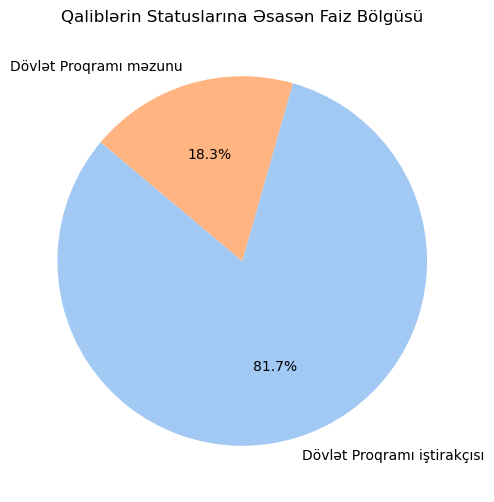

In [39]:
# Status sütununun dəyərlərinin sayını hesablayırıq.
status_counts = data['Status'].value_counts()

# Hər bir statusun faizini hesablayırıq.
status_percentages =((status_counts / status_counts.sum()) * 100).round(2)

# Say və faiz dəyərlərindən ibarət yeni DataFrame yaradaq.
status_summary = pd.DataFrame({
    'Sayı': status_counts,
    'Faizi': status_percentages
})
# Məlumatları çap edək.
print("***Qaliblərin Statuslarına Əsasən Sayı Və Faizi:***")
print(status_summary)

# Vizuallaşdırma
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel', n_colors=len(status_summary))
plt.pie(status_summary['Sayı'], labels=status_summary.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Qaliblərin Statuslarına Əsasən Faiz Bölgüsü")
plt.show()

***Qaliblərin Təhsil Səviyyələrinə Görə Sayları Və Faizləri:***
                  Sayı   Faiz
Təhsil səviyyəsi             
Magistratura       528  79.88
Bakalavriat        133  20.12


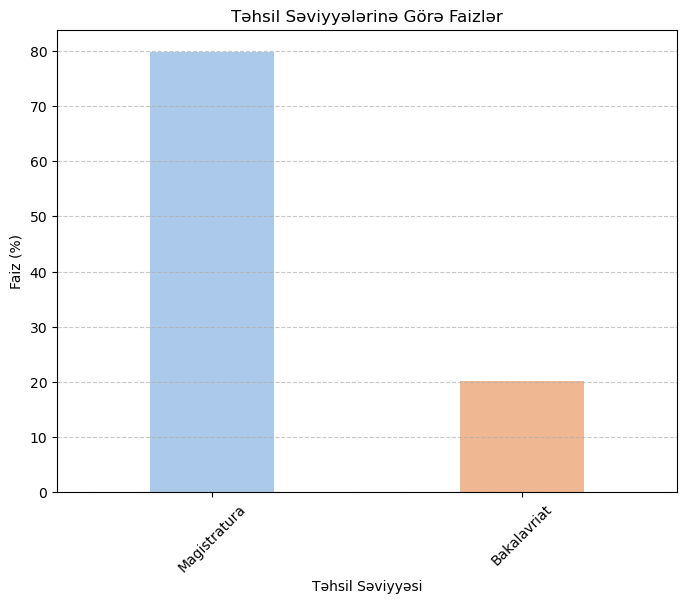

In [41]:
# Təhsil səviyyəsinə görə dəyərlərin sayını və faizlərini hesablayırıq
tehsil_seviyesi_say = data['Təhsil səviyyəsi'].value_counts()

tehsil_seviyesi_faiz = ((tehsil_seviyesi_say / tehsil_seviyesi_say.sum()) * 100).round(2)  # Faizləri yuvarlaqlaşdırırıq

# Say və yuvarlanmış faizlərdən ibarət yeni DataFrame yaradırıq
tehsil_seviyesi_summary = pd.DataFrame({
    'Sayı': tehsil_seviyesi_say,
    'Faiz': tehsil_seviyesi_faiz
})

# Məlumatları çap edək
print("***Qaliblərin Təhsil Səviyyələrinə Görə Sayları Və Faizləri:***")
print(tehsil_seviyesi_summary)

# Vizuallaşdırma
plt.figure(figsize=(8, 6))  
sns.barplot(x=tehsil_seviyesi_summary.index, y='Faiz', data=tehsil_seviyesi_summary, palette='pastel',width=0.4)
plt.title('Təhsil Səviyyələrinə Görə Faizlər')
plt.xlabel('Təhsil Səviyyəsi')
plt.ylabel('Faiz (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***Təhsil səviyyələrinə əsasən ən çox seçilən 5 ölkə:***
Təhsil səviyyəsi  Təhsil ölkəsi                                         
Bakalavriat       Türkiyə Respublikası                                       70
                  Böyük Britaniya və Şimali İrlandiya Birləşmiş Krallığı     18
                  Amerika Birləşmiş Ştatları                                 16
                  Kanada                                                     10
                  Sinqapur Respublikası                                       6
Magistratura      Böyük Britaniya və Şimali İrlandiya Birləşmiş Krallığı    346
                  Amerika Birləşmiş Ştatları                                 54
                  Almaniya Federativ Respublikası                            40
                  İtaliya Respublikası                                       28
                  Türkiyə Respublikası                                       10
Name: count, dtype: int64


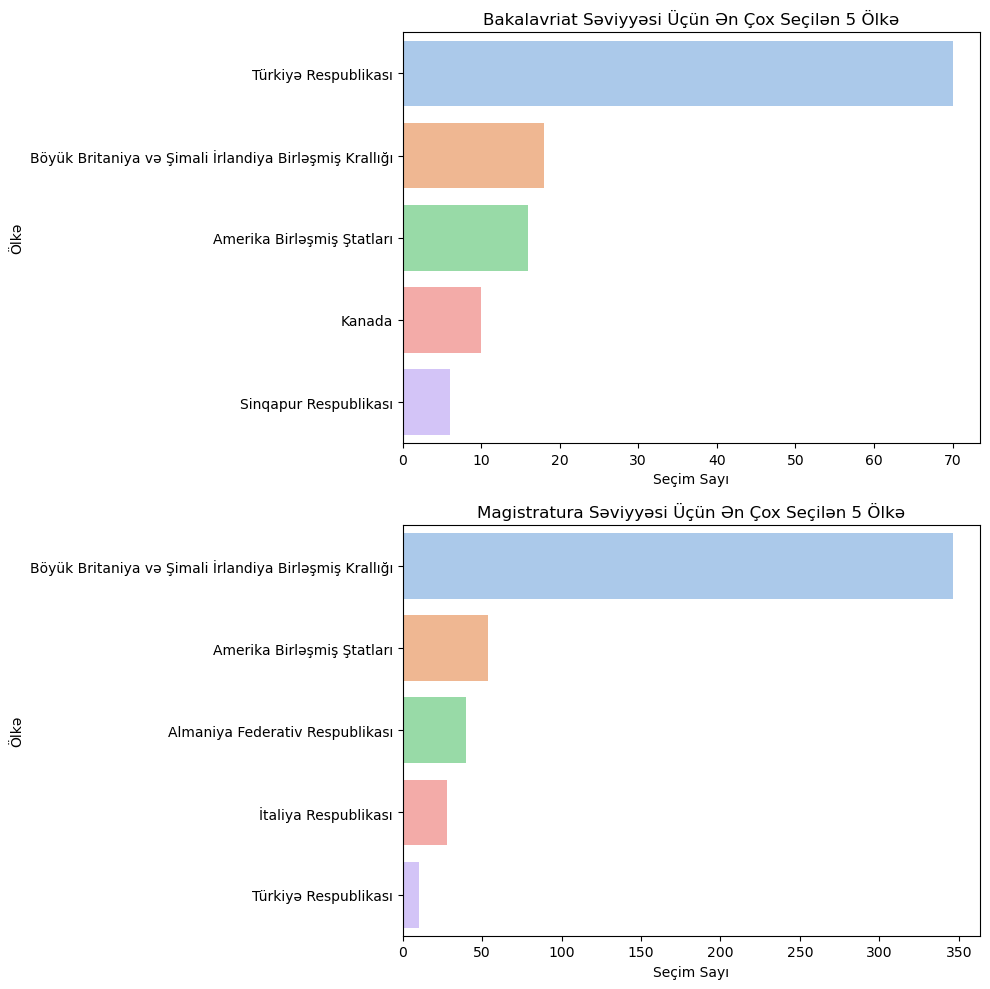

In [17]:
# Təhsil səviyyəsinə görə ölkələrin sayını hesablayırıq
olke_secimi = data.groupby('Təhsil səviyyəsi')['Təhsil ölkəsi'].value_counts()

# Ən çox seçilən 5 ölkəni tapırıq
top_5_countries = olke_secimi.groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

# Nəticələri çap edirik
print("***Təhsil səviyyələrinə əsasən ən çox seçilən 5 ölkə:***")
print(top_5_countries)

# Vizuallaşdırma
# Təhsil səviyyələrinə görə unique dəyərləri əldə edirik
education_levels = top_5_countries.index.get_level_values('Təhsil səviyyəsi').unique()
fig, axes = plt.subplots(nrows=len(education_levels), ncols=1, figsize=(10, len(education_levels) * 5))

for ax, level in zip(axes, education_levels):
    level_counts = top_5_countries[level]
    
    sns.barplot(x=level_counts.values, y=level_counts.index, palette='pastel', ax=ax)
    ax.set_title(f'{level} Səviyyəsi Üçün Ən Çox Seçilən 5 Ölkə')
    ax.set_xlabel('Seçim Sayı')
    ax.set_ylabel('Ölkə')
plt.tight_layout()
plt.show()

***Qaliblərin Müraciət Etdiyi İxtisaslar:***
İxtisas
Maliyyə                                           50
İqtisadiyyat                                      42
Kompüter mühəndisliyi                             36
Dövlət idarəetməsi                                18
Kompüter elmləri                                  16
İqtisadiyyat və maliyyə                           15
Dövlət siyasəti                                   15
Neft mühəndisliyi                                 10
Data elmi                                         10
İnklüziv təhsil: araşdırma, siyasət və təcrübə     9
Qabaqcıl kompüter elmi                             9
Təchizat zənciri və logistik idarəetmə             9
Maliyyə analitikası                                8
Kəmiyyət maliyyəsi                                 7
Biznesin idarə edilməsi                            7
Mühasibat uçotu və maliyyə                         7
İnşaat mühəndisliyi                                6
Təhsil idarəetməsi                            

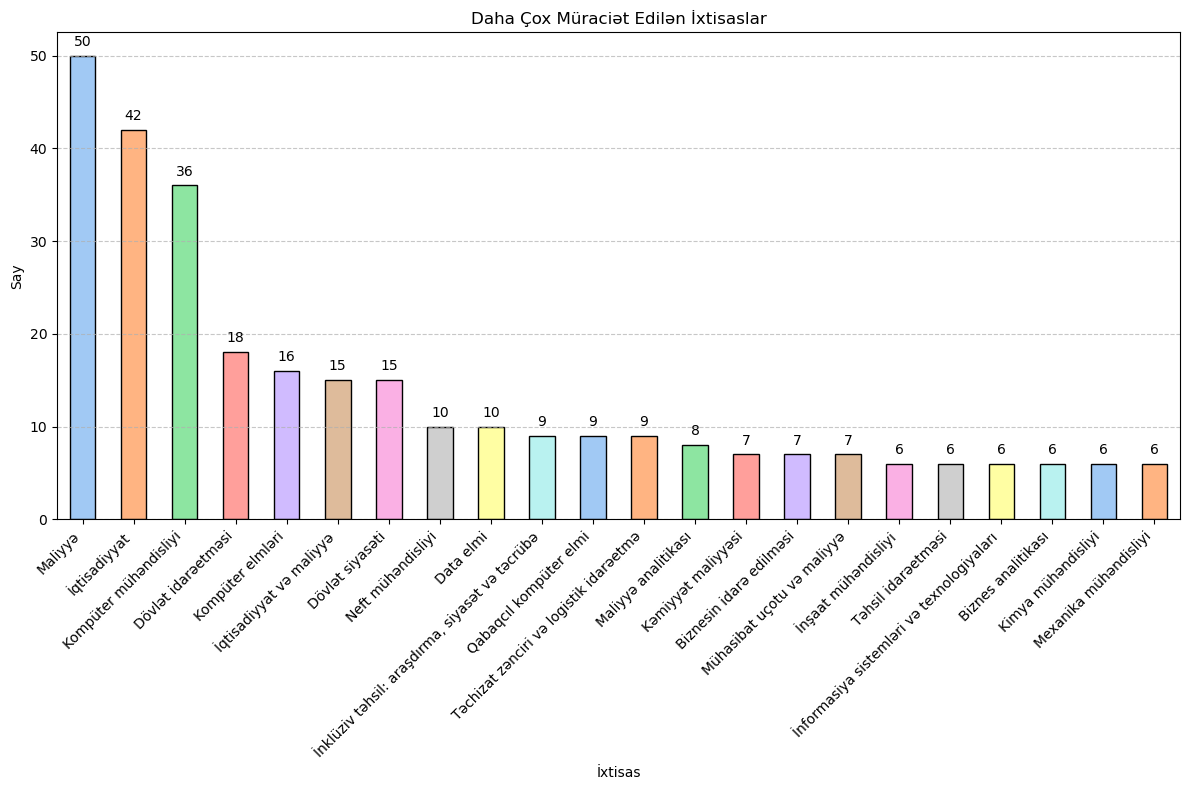

In [11]:
ixtisas_values_counts = data['İxtisas'].value_counts()
filtered_values = ixtisas_values_counts[ixtisas_values_counts > 5]
print("***Qaliblərin Müraciət Etdiyi İxtisaslar:***")
print(filtered_values)

# Vizuallaşdırma
plt.figure(figsize=(12, 8))
ax = filtered_values.plot(kind='bar', color=sns.color_palette("pastel"), edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.title("Daha Çox Müraciət Edilən İxtisaslar")
plt.xlabel("İxtisas")
plt.ylabel("Say")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

***Təhsil səviyyəsinə görə seçilən ixtisaslar***
Təhsil səviyyəsi  İxtisas                                       
Bakalavriat       Kompüter mühəndisliyi                             34
                  İqtisadiyyat                                      13
                  Kompüter elmləri                                  12
                  İnformasiya sistemləri və texnologiyaları          6
Magistratura      Maliyyə                                           50
                  İqtisadiyyat                                      29
                  Dövlət idarəetməsi                                17
                  Dövlət siyasəti                                   15
                  İqtisadiyyat və maliyyə                           14
                  Data elmi                                         10
                  Təchizat zənciri və logistik idarəetmə             9
                  İnklüziv təhsil: araşdırma, siyasət və təcrübə     9
                  Qabaqcıl kompüte

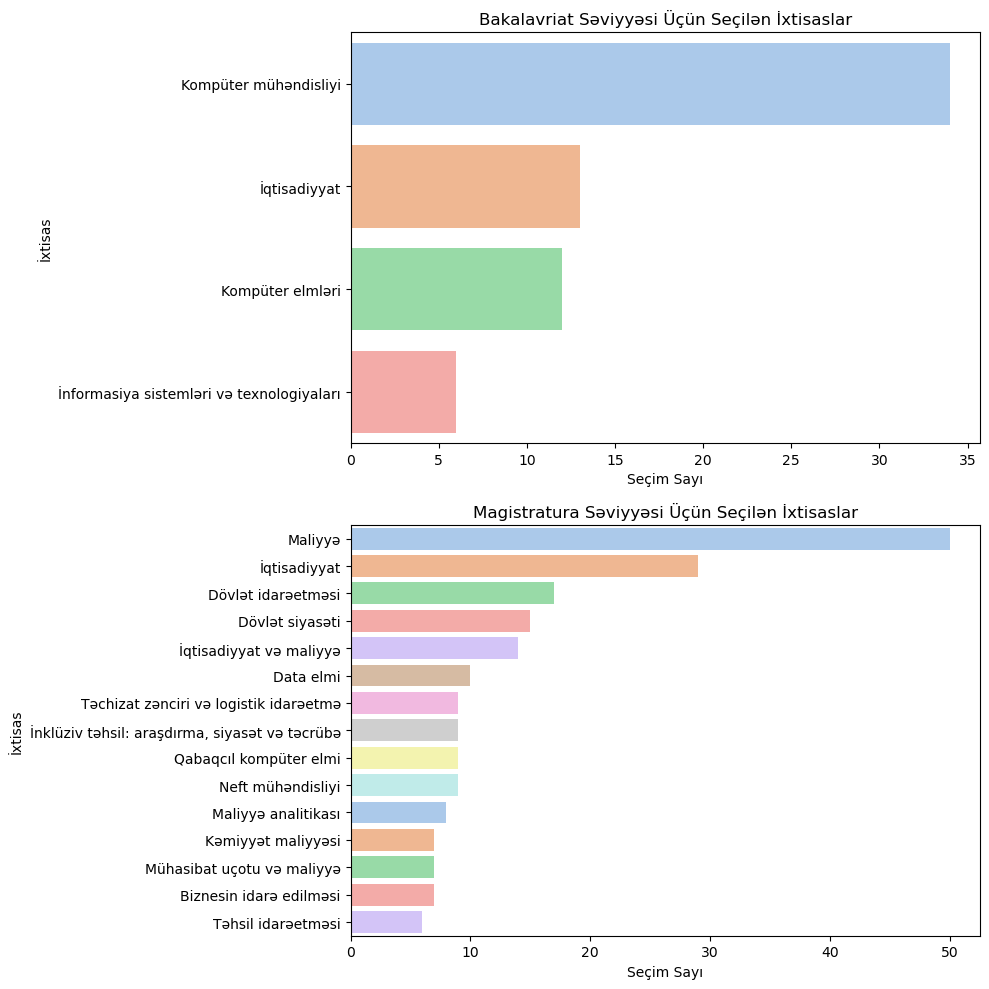

In [47]:
filtered_counts = data.groupby('Təhsil səviyyəsi')['İxtisas'].value_counts().loc[
    lambda x: x > 5
]

print("***Təhsil səviyyəsinə görə seçilən ixtisaslar***")
print(filtered_counts) 

# Vizuallaşdırma
education_levels = filtered_counts.index.get_level_values('Təhsil səviyyəsi').unique()
plt.figure(figsize=(10, len(education_levels) * 5))

for i, level in enumerate(education_levels, 1):
    level_counts = filtered_counts[level]
    
    plt.subplot(len(education_levels), 1, i)
    sns.barplot(x=level_counts.values, y=level_counts.index, palette='pastel')
    plt.title(f'{level} Səviyyəsi Üçün Seçilən İxtisaslar')
    plt.xlabel('Seçim Sayı')
    plt.ylabel('İxtisas')
plt.tight_layout()
plt.show()

***Bakalavriat Səviyyəsində Ən Çox Seçilən 5 Universitet:***
Universitet
"Koç University"                      30
"Bilkent University"                  20
"Sabanci University"                   7
"Middle East Technical University"     6
"Istanbul Technical University"        5
Name: count, dtype: int64

***Magistratura Səviyyəsində Ən Çox Seçilən 5 Universitet:***
Universitet
"University of Manchester"    33
"King’s College London"       28
"University of Glasgow"       24
"University of Edinburgh"     23
"University of Exeter"        21
Name: count, dtype: int64


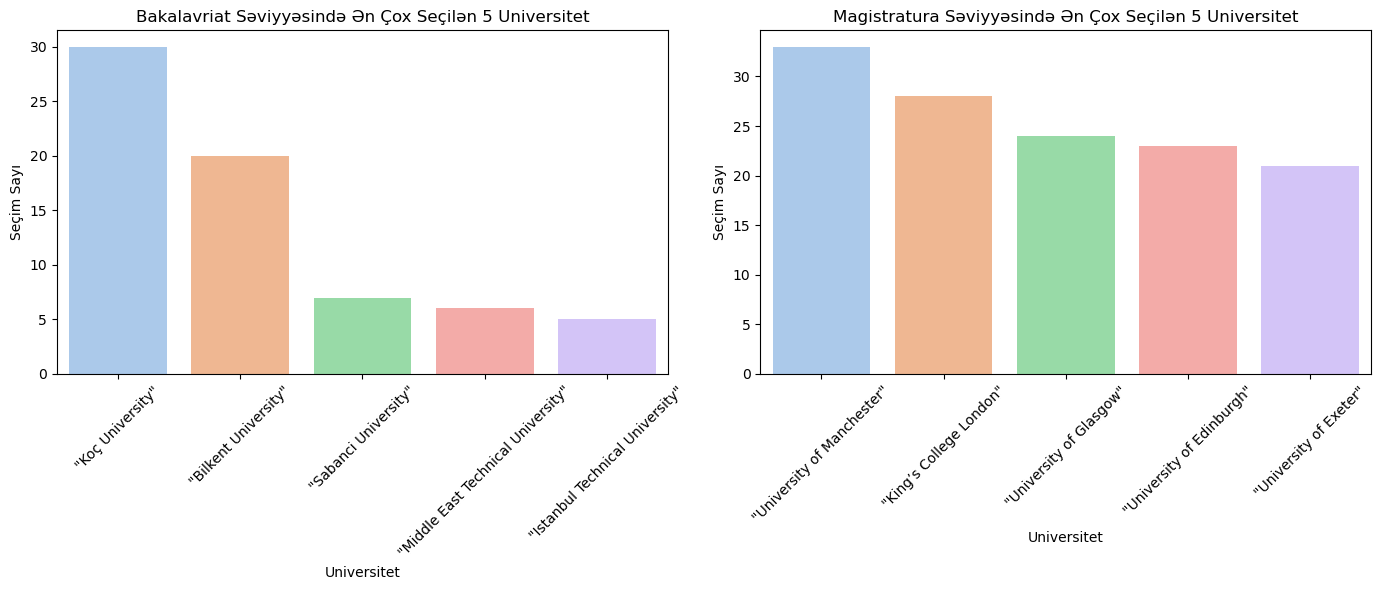

In [49]:
# Təhsil səviyyəsinə görə ən çox seçilən 5 universitetlərə baxaq.
top_5_bachelor_universities = data[data['Təhsil səviyyəsi'] == 'Bakalavriat']['Universitet'].value_counts().head(5)
top_5_master_universities = data[data['Təhsil səviyyəsi'] == 'Magistratura']['Universitet'].value_counts().head(5)

# Nəticələri çap edirik.
print(f"***Bakalavriat Səviyyəsində Ən Çox Seçilən 5 Universitet:***\n{top_5_bachelor_universities}\n")
print(f"***Magistratura Səviyyəsində Ən Çox Seçilən 5 Universitet:***\n{top_5_master_universities}")

# Vizuallaşdırma
plt.figure(figsize=(14, 6))

# Bakalavriat səviyyəsi üçün çubuq qrafiki
plt.subplot(1, 2, 1) 
sns.barplot(x=top_5_bachelor_universities.index, y=top_5_bachelor_universities.values, palette='pastel')
plt.title('Bakalavriat Səviyyəsində Ən Çox Seçilən 5 Universitet')
plt.xlabel('Universitet')
plt.ylabel('Seçim Sayı')
plt.xticks(rotation=45)

# Magistratura səviyyəsi üçün çubuq qrafiki
plt.subplot(1, 2, 2)  
sns.barplot(x=top_5_master_universities.index, y=top_5_master_universities.values, palette='pastel')
plt.title('Magistratura Səviyyəsində Ən Çox Seçilən 5 Universitet')
plt.xlabel('Universitet')
plt.ylabel('Seçim Sayı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()